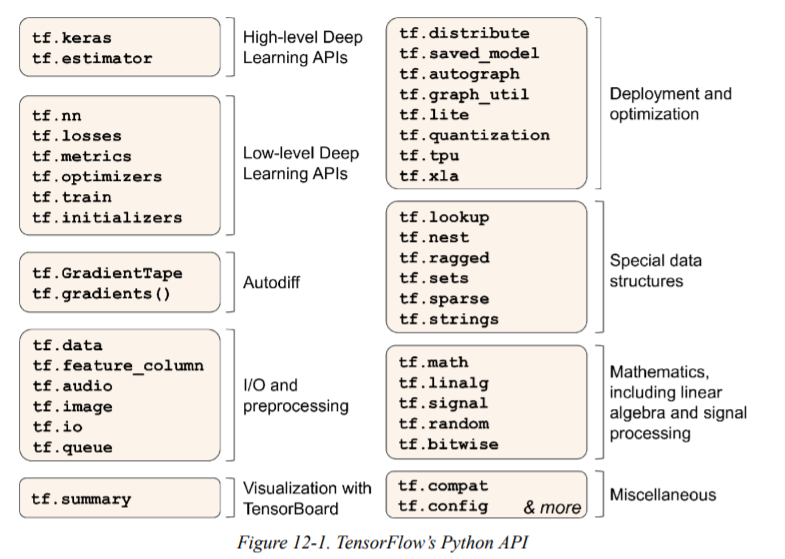

In [1]:
# set up 

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.4 is required in this notebook
# Earlier 2.x versions will mostly work the same, but with a few bugs
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.4"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### P488 - P532

### Use tensorflow like Numpy 

In [2]:
import tensorflow as tf 

In [3]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # (2, 3) matrix 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [4]:
tf.constant(42) # scalar 

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [5]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

In [6]:
t.shape

TensorShape([2, 3])

In [7]:
t.dtype

tf.float32

In [8]:
# indexing is like Numpy 

t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [9]:
# tensor operations 

t + 10 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t) 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:
# other operations 

# tf.add() 

# tl.multiply() 

# tf.square() 

# tf.exp() 

In [13]:
### Type conversions 

# can't add int with float32 or float64

### Variables

In [14]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [15]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [16]:
### could use assgin to modify the individual cells

v.assign(2 * v) 

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [17]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [18]:
v[:,2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [19]:
v.scatter_nd_update(indices=[[0,0], [1,2]], updates = [100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

### Other data structures 

In [20]:
# sparse tensors (tf.SparseTensor)

# arrays (tf.TensorArray) 

# (tf.RaggedTensor) 

# String tensors (tf.string)

# Sets: tf.constant([1, 2], [3, 4])

### Customizing Models and Training Algorthms 

In [21]:
# load, split, and scale the data 

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [22]:
### the huber loss 

def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

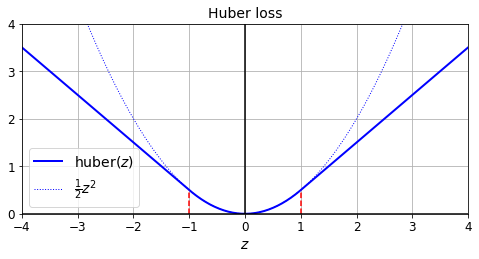

In [23]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [24]:
# define the model 

input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [25]:
# compile the model 

model.compile(loss = huber_fn, optimizer = "nadam", metrics = ["mae"])

In [26]:
# fit 

model.fit(X_train_scaled, y_train, epochs=2, 
         validation_data = (X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.6235 - mae: 0.9953 - val_loss: 0.2862 - val_mae: 0.5866
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2197 - mae: 0.5177 - val_loss: 0.2382 - val_mae: 0.5281


### Saving and Loading Models that contain custom components 

In [27]:
# save 

model.save("my_model_with_a_custom_loss.h5")

In [28]:
# map the name when loading a custom model 

model = keras.models.load_model("my_model_with_a_custom_loss.h5", 
                               custom_objects = {"huber_fn":huber_fn})

In [29]:
# when you want to design a threshold 

def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

model.compile(loss=create_huber(2.0), optimizer="nadam")



In [30]:
# remember to name the threshold when laoding the model 

# save 
model.save("my_model_with_a_custom_loss_threshold_2.h5")

# load 
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
    custom_objects={"huber_fn":create_huber(2.0)})

In [31]:
# or you can implement the threshold in a class 


### Custom Activation Functions, Initializers, Regularizers, and Constraints 

In [32]:
def my_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)


In [33]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
# class an regularizer 


class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [35]:
# define the model 

model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "selu", kernel_initializer = "lecun_normal", 
                      input_shape = input_shape), 
    keras.layers.Dense(1, activation = my_softplus, 
                      kernel_regularizer = MyL1Regularizer(0.01), 
                      kernel_constraint = my_positive_weights, 
                      kernel_initializer = my_glorot_initializer),
])

In [36]:
# compile 

model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [37]:
# fit 

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


### Custom Metrics 

In [38]:
# we can use the function just fine 

model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [39]:
# the keras will keep tract of the metric and compute the mean, 

# but in binary cases, it would be wrong 

# so use Percision() 

precision = keras.metrics.Precision()

In [40]:
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [41]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [43]:
### creating a streaming metric 

class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        # use add_weight to track the metric state over bathces
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
        # updates for one batch
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
        # make to save the threshold 
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

### Custom Layers

In [44]:
# with layers.Lambda

exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [45]:
# a model with exponential_layer

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 3ms/step - loss: 0.8196 - val_loss: 0.4068
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4644 - val_loss: 0.3770
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4016 - val_loss: 0.3511
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4409 - val_loss: 0.3592
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.3768


0.37684452533721924

In [46]:
### define a custom layer


class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        # save all standard params 
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)
    
    # tell the shape to the next layer 
    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end
    
    # activation
    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)
    
    # return the shape 
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])
    
    #save params
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [47]:
# say if you want to add Gaussian noise during training 

class MyGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs): 
        super().__init__(**kwargs) 
        self.stddev = stddev
        
    def call(self, X, training = None) :
        if training: 
            noise = tf.random.normal(tf.shape(X), stddev = self.stddev) 
            return X + noise 
        else: 
            return X 
        
    def compute_output_shape(self, batch_input_shape): 
        return batch_input_shape

### Custom Models

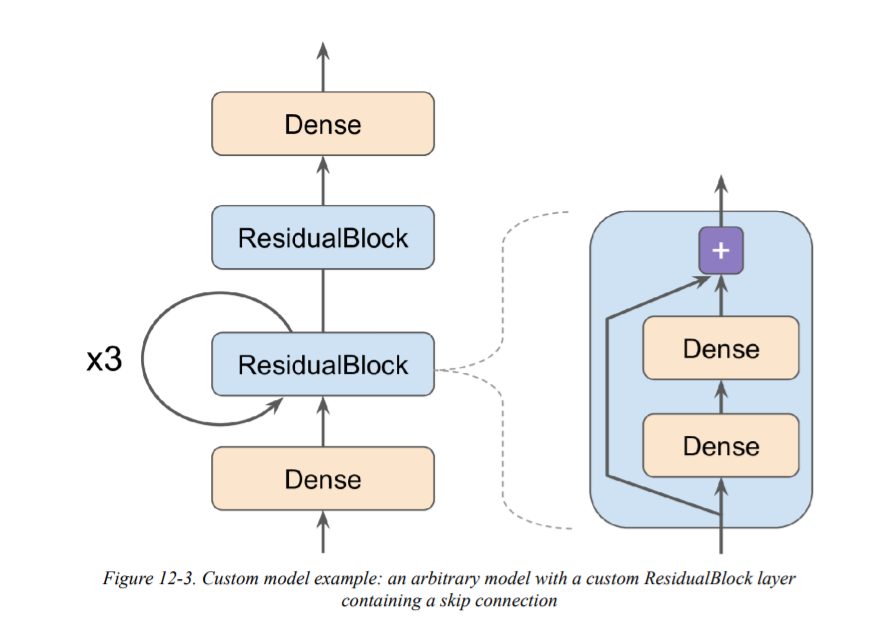

In [48]:
# data 

X_new_scaled = X_test_scaled

# e.g. a resifual block 

class ResidualBlock(keras.layers.Layer): 
    def __init__(self, n_layers, n_neurons, **kwargs): 
        super().__init__(**kwargs) 
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu", 
                                         kernel_initializer = "he_normal")
                      for _ in range(n_layers)]
    
    def call(self, inputs): 
        Z = inputs 
        for layer in self.hidden: 
            Z = layer(Z) 
        return inputs + Z

In [49]:
# e.g. a residual block 

class ResidualRegressor(keras.models.Model): 
    def __init__(self, output_dim, **kwargs): 
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation = "elu", 
                                         kernel_initializer = "he_normal")
        self.block1 = ResidualBlock(2, 30) 
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim) 
        
    def call(self, inputs): 
        Z = self.hidden1(inputs) 
        for _ in range(1 + 3): 
            Z = self.block1(Z) 
        Z = self.block2(Z) 
        return self.out(Z)

In [50]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [51]:
# train the model 

model = ResidualRegressor(1) 
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs = 5) 
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 4s 3ms/step - loss: 9.1325
Epoch 2/5
363/363 [==============================] - 2s 5ms/step - loss: 1.0577
Epoch 3/5
363/363 [==============================] - 2s 6ms/step - loss: 0.8866
Epoch 4/5
363/363 [==============================] - 2s 6ms/step - loss: 0.5837
Epoch 5/5
162/162 [==============================] - 1s 2ms/step - loss: 0.6490


### Losses and Metrics Based on Model Internals 

In [52]:
# reconstructing regressor 

class ReconstructingRegressor(keras.models.Model): 
    def __init__(self, output_dim, **kwargs): 
        super().__init__(**kwargs)
        # 5 dense hidden layers 
        self.hidden = [keras.layers.Dense(30, activation = "selu",
                                         kernel_initializer = "lecun_normal")
                      for _ in range(5)]
        self.out = keras.layers.Dense(output_dim) 
        self.reconstruct = keras.layers.Dense(8) 
        self.reconstruction_mean = keras.metrics.Mean(name = "reconstruction_error")
        
    def call(self, inputs, training = None): 
        Z = inputs 
        for layer in self.hidden: 
            Z = layer(Z) 
        reconstruction = self.reconstruct(Z) 
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss) 
        if training: 
            result = self.reconstruction_mean(recon_loss) 
            self.add_metric(result) 
        return self.out(Z)

In [53]:
# set random 

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
# compile and train

model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Epoch 1/2
363/363 [==============================] - 4s 3ms/step - loss: 0.7885 - reconstruction_error: 1.0474
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.4126 - reconstruction_error: 0.4022


### Computing Gradients with Autodiff 

In [55]:
def f(w1, w2): 
    return 3 * w1 ** 2 + 2 * w1 * w2 

In [56]:
# the gradient = 6 * w1 + 2 * w2, and 2 * w1 

# can approximately get the gradient 


In [57]:
# use autodiff 

w1, w2 = tf.Variable(5.), tf.Variable(3.) 

with tf.GradientTape() as tape: 
    z = f(w1, w2) 
    
gradients = tape.gradient(z, [w1, w2])

gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [77]:
# set "persistent = True" if want to keep it in memmory 

In [58]:
# P519

In [59]:
### stop backprop 

def f(w1, w2): 
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2) 

with tf.GradientTape() as tape: 
    z = f(w1, w2) 
    
gradients = tape.gradient(z, [w1, w2])

In [60]:
### softplus 

def my_better_softplus(z): 
    exp = tf.exp(z) 
    def my_softplus_gradient(grad): 
        return grad / ( 1 + 1 / exp) 
    return tf.math.log(exp + 1), my_softplus_gradients 


### Custom Training Loops 

In [61]:
### tips: you should prefer more on fit() 

In [63]:
# build a simple model 

l2_reg = keras.regularizers.l2(0.05) 

model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'elu', kernel_initializer = "he_normal", 
                      kernel_regularizer = l2_reg), 
    keras.layers.Dense(1, kernel_regularizer = l2_reg) 
])

In [64]:
# random sample batch 

def random_batch(X, y, batch_size = 32): 
    idx = np.random .randint(len(X), size = batch_size) 
    return X[idx], y[idx]

In [72]:
# satus bar 


def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

In [73]:
# training status: num_steps, sum_steps, mean_loss

def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)

In [74]:
# define some params 

n_epochs = 5 
batch_size = 32 
n_steps = len(X_train) // batch_size 
optimizer = keras.optimizers.Nadam(lr = 0.01) 
loss_fn = keras.losses.mean_squared_error 
mean_loss = keras.metrics.Mean() 
metrics = [keras.metrics.MeanAbsoluteError()]

In [75]:
# build the custom loop 

for epoch in range(1, n_epochs + 1): 
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1): 
        X_batch, y_batch = random_batch(X_train_scaled, y_train) 
        with tf.GradientTape() as tape: 
            y_pred = model(X_batch, training = True)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred)) 
            loss = tf.add_n([main_loss] + model.losses) 
        gradients = tape.gradient(loss, model.trainable_variables) 
        optimizer.apply_gradients(zip(gradients, model.trainable_variables)) 
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss) 
        for metric in metrics: 
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics: 
        metric.reset_states() 

Epoch 1/5
11610/11610 [==============================] - mean: 0.6507 - mean_absolute_error: 0.5213
Epoch 2/5
11610/11610 [==============================] - mean: 0.6312 - mean_absolute_error: 0.5089
Epoch 3/5
11610/11610 [==============================] - mean: 0.6399 - mean_absolute_error: 0.5155
Epoch 4/5
11610/11610 [==============================] - mean: 0.6351 - mean_absolute_error: 0.5114
Epoch 5/5
11610/11610 [==============================] - mean: 0.6219 - mean_absolute_error: 0.5056


### Tensorflow Funstions and Graphs 

In [76]:
### the cube example 

def cube(x): 
    return x ** 3

In [77]:
cube(2)

8

In [78]:
# use tf 

tf_cube = tf.function(cube) 

tf_cube 

In [79]:
# boost a python function to a tf function 

# as tf is faster using the computation graph

### AutoGraph and Tracing 

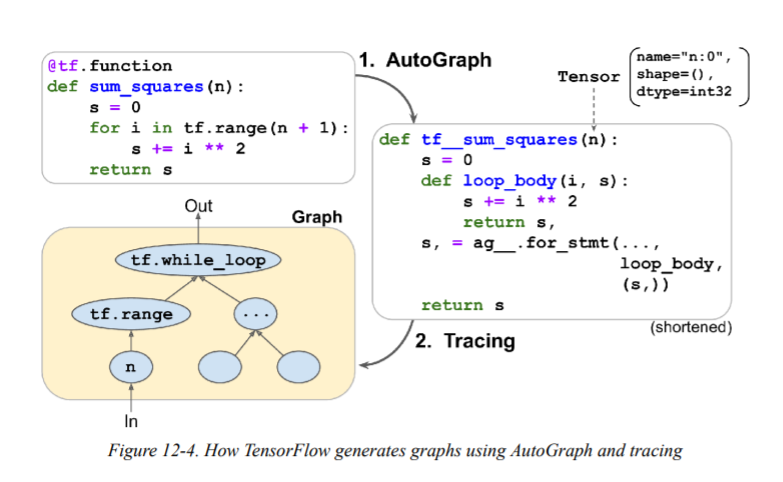